In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Load the data
results = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/QoE_predictive.csv')
results.columns = ['server_id', 'service_id', 'client_id', 'prediction', 'compute_time', 'pred_accuracy',
                   'total_qoe', 'accuracy_qoe', 'delay_qoe', 'req_acc', 'req_delay', 'model',
                   'added_time', 'timestamp', 'accuracy', 'ground_truth']

# Convert timestamp to datetime
results['timestamp'] = pd.to_datetime(results['timestamp'])
results

,server_id,service_id,client_id,prediction,compute_time,pred_accuracy,total_qoe,accuracy_qoe,delay_qoe,req_acc,req_delay,model,added_time,timestamp,accuracy,ground_truth
0,EDGE-1,imagenet_image_classification,raspi-1,tabby,1.655331,0.733051,0.446817,0.863428,0.030205,0.849,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-26 13:22:07.673,0,cat
1,EDGE-1,imagenet_image_classification,raspi-1,tabby,1.730774,0.748770,0.455475,0.880905,0.030044,0.850,0.052,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-26 13:22:09.481,0,cat
2,EDGE-1,imagenet_image_classification,raspi-1,tabby,1.708031,0.656469,0.400341,0.771409,0.029273,0.851,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-26 13:22:11.329,0,cat
3,EDGE-1,imagenet_image_classification,raspi-1,Persian cat,1.716816,0.626604,0.383587,0.738049,0.029124,0.849,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-26 13:22:13.148,0,cat
4,EDGE-1,imagenet_image_classification,raspi-1,Egyptian cat,1.671957,0.216377,0.142383,0.254861,0.029905,0.849,0.050,550e8400-e29b-41d4-a716-446655440000,03-04-2023 15:13:05,2024-09-26 13:22:15.004,0,cat
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5933,EDGE-1,imagenet_image_classification,raspi-2,Egyptian cat,0.303075,0.716963,0.551142,1.000000,0.102285,0.699,0.031,550e8400-e29b-41d4-a716-446655440005,03-04-2023 15:24:05,2024-09-26 14:47:03.081,0,cat
5934,EDGE-1,imagenet_image_classification,raspi-2,tabby,0.351455,0.158222,0.156957,0.225709,0.088205,0.701,0.031,550e8400-e29b-41d4-a716-446655440005,03-04-2023 15:24:05,2024-09-26 14:47:03.565,0,cat
5935,EDGE-1,imagenet_image_classification,raspi-2,tiger cat,0.309264,0.138959,0.144525,0.198512,0.090537,0.700,0.028,550e8400-e29b-41d4-a716-446655440005,03-04-2023 15:24:05,2024-09-26 14:47:04.274,0,cat
5936,EDGE-1,imagenet_image_classification,raspi-2,dishwasher,0.293657,0.205143,0.198241,0.294323,0.102160,0.697,0.030,550e8400-e29b-41d4-a716-446655440005,03-04-2023 15:24:05,2024-09-26 14:47:04.791,0,cat


In [70]:
power = pd.read_csv('/Users/neeleshkarthikeyan/d2i/cyberinfrastructure-knowledge-network/plugins/power_monitoring/server/power.csv')
power.columns = ['timestamp', 'cpu_millivolts', 'cpu_milliamperes', 'cpu_milliwatt', 'cpu_avg_milliwatt',
                 'gpu_millivolts', 'gpu_milliamperes', 'gpu_milliwatt', 'gpu_avg_milliwatt', 'total_millivolts', 'total_milliamperes', 'total_milliwatt', 'total_avg_milliwatt']

# Convert timestamp to datetime
power['timestamp'] = pd.to_datetime(power['timestamp'])
power

,timestamp,cpu_millivolts,cpu_milliamperes,cpu_milliwatt,cpu_avg_milliwatt,gpu_millivolts,gpu_milliamperes,gpu_milliwatt,gpu_avg_milliwatt,total_millivolts,total_milliamperes,total_milliwatt,total_avg_milliwatt
0,2024-09-26 13:19:50,5184,32,165,165,5176,24,124,124,5184,368,1907,1907
1,2024-09-26 13:19:51,5144,200,1028,596,5144,16,82,103,5152,528,2761,2334
2,2024-09-26 13:19:52,5152,200,1028,812,5152,16,82,92,5152,528,2720,2527
3,2024-09-26 13:19:53,5144,200,1027,919,5136,40,205,148,5136,592,3081,2804
4,2024-09-26 13:19:54,5128,200,1025,972,5128,16,82,115,5128,624,3199,3001
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10349,2024-09-26 16:40:33,5160,104,536,538,5160,40,206,127,5160,464,2394,2281
10350,2024-09-26 16:40:34,5152,144,741,639,5160,8,41,84,5160,448,2311,2296
10351,2024-09-26 16:40:35,5160,112,577,608,5160,48,247,165,5160,472,2435,2365
10352,2024-09-26 16:40:36,5176,112,578,593,5168,0,0,82,5176,408,2111,2238


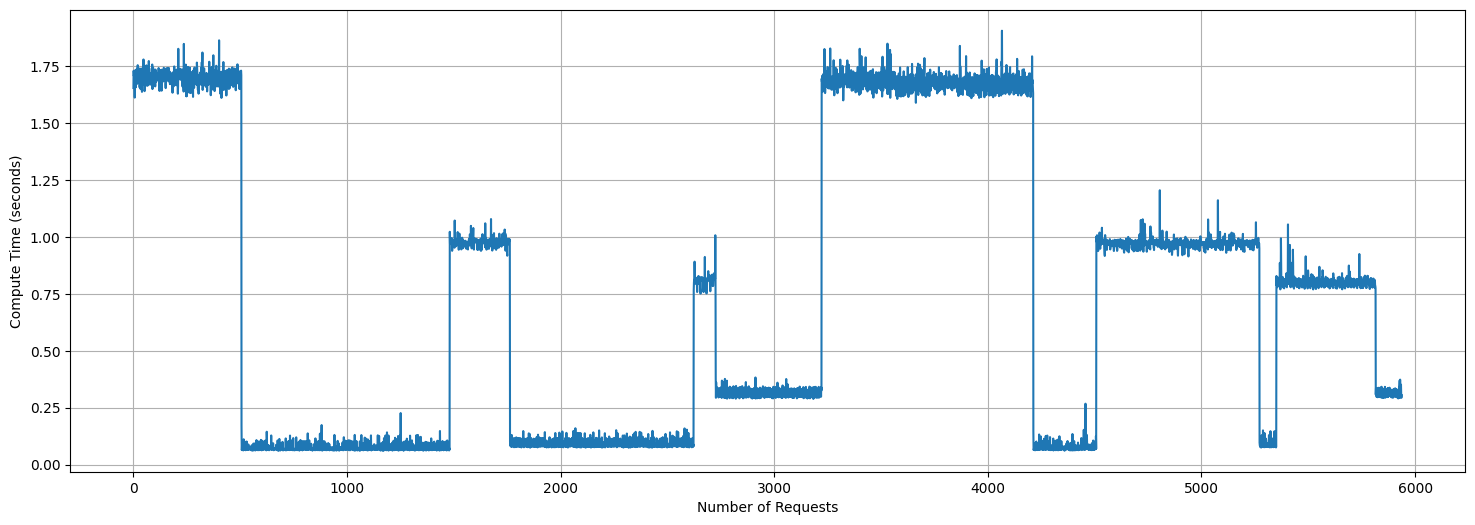

In [71]:
plt.figure(figsize=(18, 6))
plt.plot(results['compute_time'])
plt.xlabel('Number of Requests')
plt.ylabel('Compute Time (seconds)')
plt.grid(True)
plt.show()

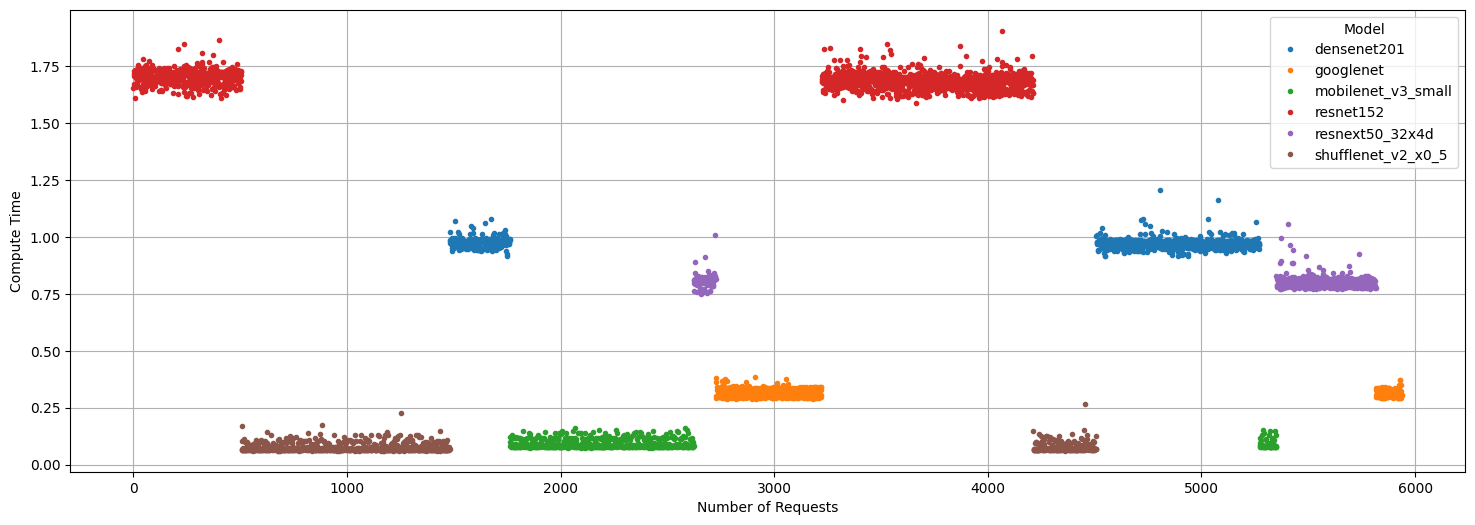

In [72]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 6))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['compute_time'], marker='.', linestyle='', label=model)

plt.xlabel('Number of Requests')
plt.ylabel('Compute Time')

plt.grid(True)
plt.legend(title='Model')
plt.show()

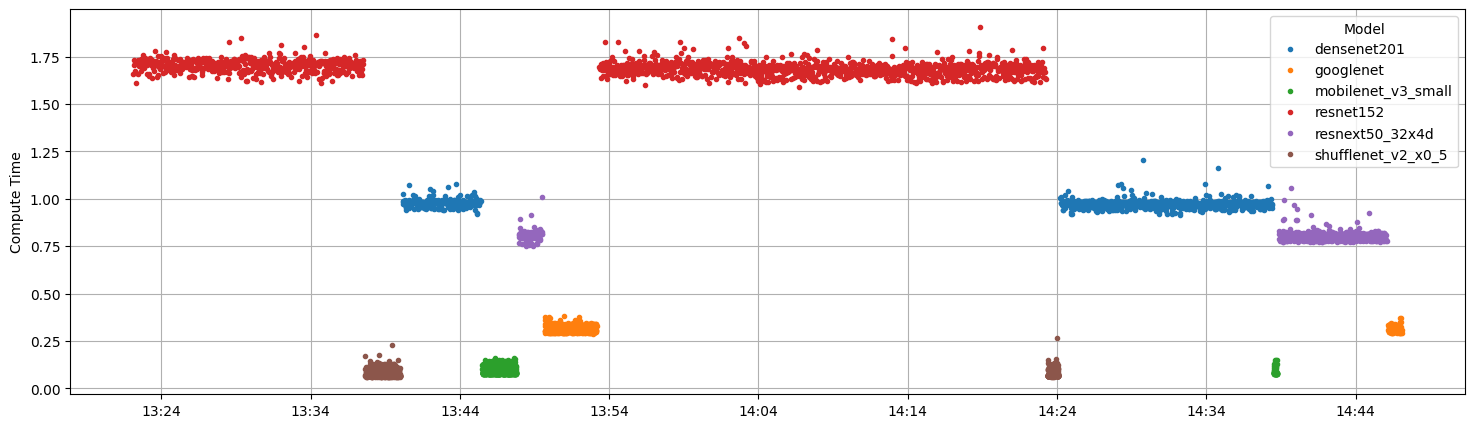

In [73]:
# Define the model mapping
model_mapping = {
    "550e8400-e29b-41d4-a716-446655440000": "resnet152",
    "550e8400-e29b-41d4-a716-446655440001": "shufflenet_v2_x0_5",
    "550e8400-e29b-41d4-a716-446655440002": "densenet201",
    "550e8400-e29b-41d4-a716-446655440003": "mobilenet_v3_small",
    "550e8400-e29b-41d4-a716-446655440004": "resnext50_32x4d",
    "550e8400-e29b-41d4-a716-446655440005": "googlenet"
}

# Replace model IDs with names
results['model'] = results['model'].replace(model_mapping)

# Plot the data with different colors for each model
plt.figure(figsize=(18, 5))

# Group by model and plot each group separately
for model, group in results.groupby('model'):
    plt.plot(group['timestamp'], group['compute_time'], marker='.', linestyle='', label=model)

plt.ylabel('Compute Time')
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.grid(True)
plt.legend(title='Model')
plt.show()

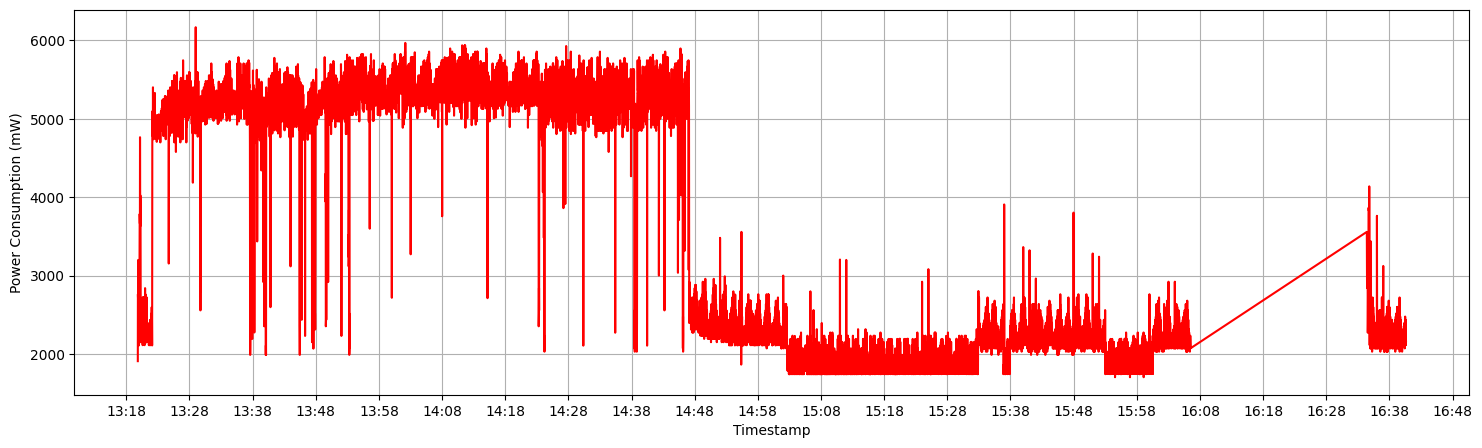

In [74]:
plt.figure(figsize=(18, 5))
plt.plot(power['timestamp'], power['total_milliwatt'], color="r")
plt.xlabel('Timestamp')
plt.ylabel('Power Consumption (mW)')
plt.grid(True)
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.show()

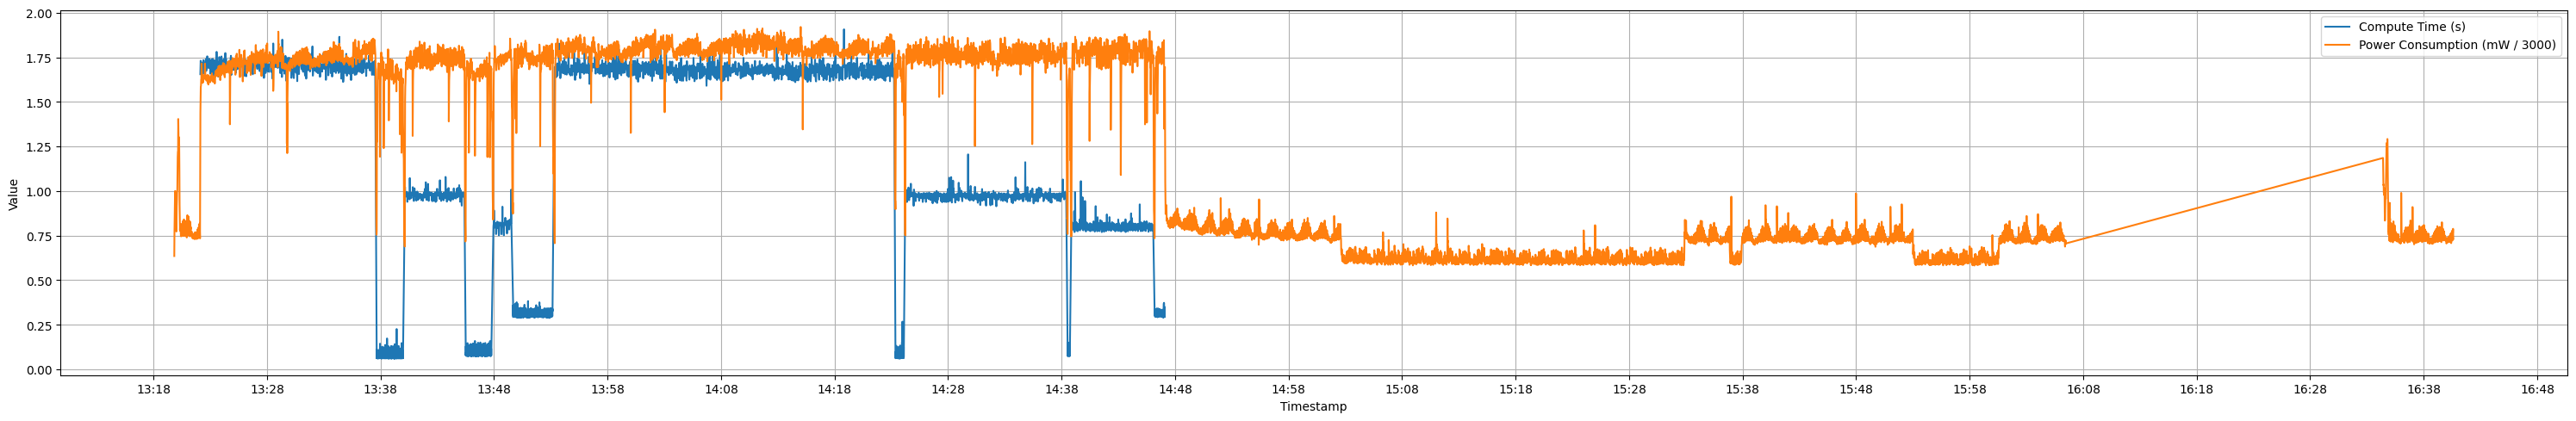

In [75]:
# Plot the data
plt.style.use('default')
plt.figure(figsize=(30, 5), facecolor='white')
plt.plot(results['timestamp'], results['compute_time'], label='Compute Time (s)')
plt.plot(power['timestamp'], power['total_avg_milliwatt']/3000, label='Power Consumption (mW / 3000)')
plt.xlabel('Timestamp')
plt.ylabel('Value')
plt.grid(True)
plt.legend()
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(mdates.MinuteLocator(interval=10))
plt.tight_layout()
plt.show()